## Test kommuner Geojson  med styre
* [tweet](https://twitter.com/Landgren/status/1486740776826585088?s=20&t=K5KALeO2sTktDmGiJ1GwoA) vill vi ha en karta med kommuner....
  *  user story2 "_Politisk majoritet i varje kommun, kan man lägga till det fältet i municipality?_"

* denna [notebook](https://github.com/salgo60/open-data-examples/blob/master/GeoJson%20kommuner.ipynb)
  * [gist kombinerad med vem som styr i geojson](https://gist.github.com/salgo60/997142eafad5a1bf01deae91214d8ba1) 
B = Borgerlig
V = Vänster
BL = Blandat
Ö = Övrigt

![](https://user-images.githubusercontent.com/14206509/151426953-a1c8997c-4651-4b80-ab7d-a2ad4793ddae.png)

* GIST med var datat finns - [Valresultat kommuner](https://gist.github.com/salgo60/6078c98809a06f5b1fd665990398e9f8)

  * [CSV styre](https://gist.githubusercontent.com/salgo60/21860059ae3da3dbf26016b4ec34565b/raw/1f10ad71eb3e2c3e5427054a80915c56c5618e7e/kommunval.csv) 
  * [GeoJson kommuner](https://gist.github.com/salgo60/509cdecf107dfb2cf0ca820082b2e101) - [raw](https://gist.githubusercontent.com/salgo60/509cdecf107dfb2cf0ca820082b2e101/raw/c53fed3fc5373a96147375765690636970a2f9be/Kommuner%2520Sverige.json)


In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2022-01-27 20:25:37.554250


In [2]:
fileGeoJson ="https://gist.githubusercontent.com/salgo60/509cdecf107dfb2cf0ca820082b2e101/raw/c53fed3fc5373a96147375765690636970a2f9be/Kommuner%2520Sverige.json"
csvkommunerstyre = "https://gist.githubusercontent.com/salgo60/21860059ae3da3dbf26016b4ec34565b/raw/1f10ad71eb3e2c3e5427054a80915c56c5618e7e/kommunval.csv"


In [3]:
import geopandas as gpd
dfgeo = gpd.read_file(fileGeoJson)

In [4]:
dfgeo

,name,id,geometry
0,Ã–stersund,2380,"MULTIPOLYGON (((14.94400 63.59400, 14.98000 63..."
1,Ragunda,2303,"MULTIPOLYGON (((15.98800 63.51400, 15.96600 63..."
2,BrÃ¤cke,2305,"MULTIPOLYGON (((15.31700 63.14400, 15.42500 63..."
3,Berg,2326,"MULTIPOLYGON (((14.77100 62.74900, 14.76500 62..."
4,HÃ¤rnÃ¶sand,2280,"MULTIPOLYGON (((17.32600 62.90900, 17.41600 62..."
...,...,...,...
290,Ã–stersund,2380,"MULTIPOLYGON (((14.77100 62.74900, 14.78900 62..."
291,EslÃ¶v,1285,"MULTIPOLYGON (((13.33900 56.00600, 13.38000 56..."
292,NorrkÃ¶ping,581,"MULTIPOLYGON (((16.20300 58.83700, 16.21200 58..."
293,OxelÃ¶sund,481,"MULTIPOLYGON (((17.02400 58.70000, 17.03300 58..."


In [5]:
import pandas as pd  
dfstyre = pd.read_csv(csvkommunerstyre)  
dfstyre

,Kommun,Kod,Kategori
0,Upplands Väsby kommun,114,B
1,Vallentuna kommun,115,B
2,Österåkers kommun,117,B
3,Värmdö kommun,120,B
4,Järfälla kommun,123,B
...,...,...,...
285,Luleå kommun,2580,V
286,Piteå kommun,2581,V
287,Bodens kommun,2582,BL
288,Haparanda stad,2583,B


In [6]:
dfstyre = dfstyre.rename(columns={'Kod': 'id'})

In [7]:
dfstyre = dfstyre.rename(columns={'Kategori': 'Styre'}) 
dfstyre

,Kommun,id,Styre
0,Upplands Väsby kommun,114,B
1,Vallentuna kommun,115,B
2,Österåkers kommun,117,B
3,Värmdö kommun,120,B
4,Järfälla kommun,123,B
...,...,...,...
285,Luleå kommun,2580,V
286,Piteå kommun,2581,V
287,Bodens kommun,2582,BL
288,Haparanda stad,2583,B


In [21]:
dfstyre.value_counts("Styre")
# B = Borgerlig V = Vänster BL = Blandat Ö = Övrigt

Styre
B     129
BL    116
V      39
Ö       6
dtype: int64

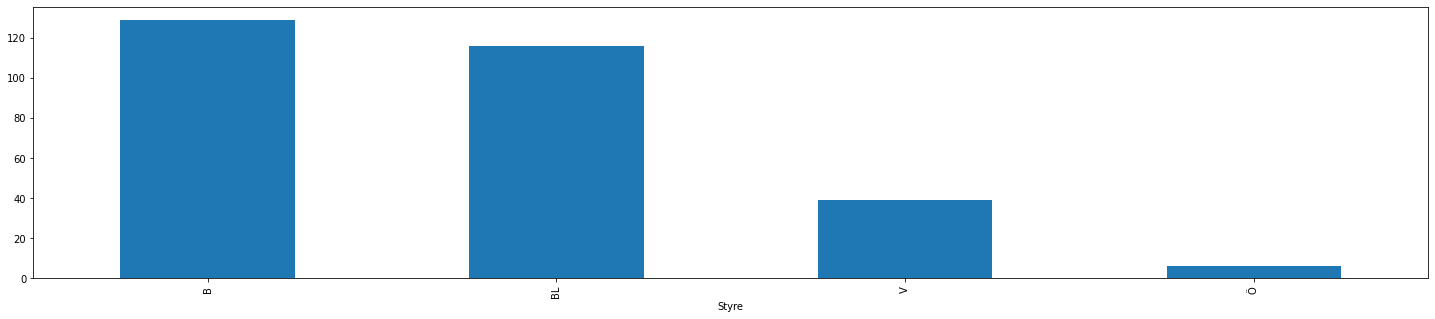

In [20]:
plotStyre = dfstyre.value_counts("Styre").plot.bar( figsize=(25, 5)) 

In [16]:
# Diff storlek?!?!?!
#dfstyre # 290
#dfgeo # 295 


In [9]:
kommun_shapes = dfgeo.merge(dfstyre, on='id')

In [10]:
kommun_shapes

,name,id,geometry,Kommun,Styre
0,Ã–stersund,2380,"MULTIPOLYGON (((14.94400 63.59400, 14.98000 63...",Östersunds kommun,B
1,Ã–stersund,2380,"MULTIPOLYGON (((14.77100 62.74900, 14.78900 62...",Östersunds kommun,B
2,Ragunda,2303,"MULTIPOLYGON (((15.98800 63.51400, 15.96600 63...",Ragunda kommun,B
3,BrÃ¤cke,2305,"MULTIPOLYGON (((15.31700 63.14400, 15.42500 63...",Bräcke kommun,BL
4,Berg,2326,"MULTIPOLYGON (((14.77100 62.74900, 14.76500 62...",Bergs kommun,BL
...,...,...,...,...,...
290,MalmÃ¶,1280,"MULTIPOLYGON (((12.97100 55.67900, 13.01800 55...",Malmö stad,BL
291,EslÃ¶v,1285,"MULTIPOLYGON (((13.33900 56.00600, 13.38000 56...",Eslövs kommun,BL
292,NorrkÃ¶ping,581,"MULTIPOLYGON (((16.20300 58.83700, 16.21200 58...",Norrköpings kommun,BL
293,OxelÃ¶sund,481,"MULTIPOLYGON (((17.02400 58.70000, 17.03300 58...",Oxelösunds kommun,V


In [11]:
kommun_shapes.drop('name', inplace=True, axis=1) 

In [12]:
kommun_shapes

,id,geometry,Kommun,Styre
0,2380,"MULTIPOLYGON (((14.94400 63.59400, 14.98000 63...",Östersunds kommun,B
1,2380,"MULTIPOLYGON (((14.77100 62.74900, 14.78900 62...",Östersunds kommun,B
2,2303,"MULTIPOLYGON (((15.98800 63.51400, 15.96600 63...",Ragunda kommun,B
3,2305,"MULTIPOLYGON (((15.31700 63.14400, 15.42500 63...",Bräcke kommun,BL
4,2326,"MULTIPOLYGON (((14.77100 62.74900, 14.76500 62...",Bergs kommun,BL
...,...,...,...,...
290,1280,"MULTIPOLYGON (((12.97100 55.67900, 13.01800 55...",Malmö stad,BL
291,1285,"MULTIPOLYGON (((13.33900 56.00600, 13.38000 56...",Eslövs kommun,BL
292,581,"MULTIPOLYGON (((16.20300 58.83700, 16.21200 58...",Norrköpings kommun,BL
293,481,"MULTIPOLYGON (((17.02400 58.70000, 17.03300 58...",Oxelösunds kommun,V


In [13]:
kommun_shapes.to_file("kommunstyre.geojson", driver='GeoJSON')

In [14]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2022-01-27 20:25:39.327903
Time elapsed (hh:mm:ss.ms) 0:00:01.774177
